<a href="https://colab.research.google.com/github/Vackam/2022_unix_github_start/blob/master/Q20-%ED%95%B4%EA%B2%B0%EB%AA%AC%ED%95%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q.19


In [22]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/diabetes.csv')
data.head()
train_data = data[:400]
test_data = data[401:442]

print(data.head())
data_set = data.columns.to_list()
data_set.remove('Y')
print(data_set)

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']


In [14]:
predictors = ['S5']
target = 'Y'

X = train_data[predictors]
y = train_data[target]

X_test = test_data[predictors]
y_test = test_data[target]

model = linear_model.LinearRegression()
model.fit(X.values, y)

print(f'Intercpet = {model.intercept_}, coef = {model.coef_}')

Intercpet = -228.85089682835022, coef = [82.09454934]


In [15]:
predict_value = [5.0]

test = model.predict([predict_value])
print(test)

[181.62184987]


In [16]:
y_pred = model.predict(X_test.values)
metrics.r2_score(y_test, y_pred)

0.3827486686389362

멀티로 조져보자.

In [29]:
predictors = ['BMI', 'BP', 'S5']
X = train_data[predictors]
y = train_data[target]

X_test = test_data[predictors]
y_test = test_data[target]

model.fit(X.values, y)
print(f'인터셉트 = {model.intercept_}, coef = {model.coef_}')

인터셉트 = -325.18966604156685, coef = [ 6.53422514  0.83030768 48.87455825]


In [18]:
predict_value = [[30.5, 100.0, 5.0]]
print(f'Predict_value = {model.predict(predict_value)}')

Predict_value = [201.50776025]


In [19]:
y_pred = model.predict(X_test.values)
print(f'r2 value = {metrics.r2_score(y_test, y_pred)}')

r2 value = 0.6670206042062763


In [33]:
a = dict()

for plus_data in data_set:
  if plus_data in predictors:
    continue
  predictors.append(plus_data)
  X = train_data[predictors]
  y = train_data[target]

  X_test = test_data[predictors]
  y_test = test_data[target]

  model.fit(X.values, y)
  y_pred = model.predict(X_test.values)
  
  a[plus_data] = metrics.r2_score(y_test, y_pred)
  
  predictors.remove(plus_data)

print(a)

{'AGE': 0.6701610663198792, 'SEX': 0.6796398031461459, 'S1': 0.6879892405294864, 'S2': 0.6790735046612912, 'S3': 0.6687449915152439, 'S4': 0.6596996462512447, 'S6': 0.6564529653870551}


## Q.20


In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/virus.csv')
train_data, test_data = train_test_split(data, train_size=0.8, random_state=1)

model2 = linear_model.LogisticRegression()

data_list = data.columns.to_list()
print(data_list)
target = 'y'
data_list.remove(target)

accuracy_set = dict()

for one_data in data_list:
  X = train_data[[one_data]]
  y = train_data[target]

  X_test = test_data[[one_data]]
  y_test = test_data[target]

  model2.fit(X.values, y)

  y_pred = model2.predict(X_test.values)

  accuracy_set[one_data] = metrics.accuracy_score(y_test, y_pred)

print(accuracy_set)

['y', 'x1', 'x2', 'x3']
{'x1': 0.5, 'x2': 0.8333333333333334, 'x3': 0.6666666666666666}


In [14]:
print(data.head())

   y  x1  x2  x3
0  0   3   6   5
1  0   4  10   4
2  1   3   5   3
3  1   3   1   5
4  1   3   1   5


In [29]:
X = train_data[['x2']]
X_test = test_data[['x2']]

model2.fit(X.values, y)

y_pred = model2.predict(X_test.values)

print(f'Intercept = {model2.intercept_}\nCoef = {model2.coef_}')

Intercept = [6.01727786]
Coef = [[-0.86821741]]


## 그 표 그리기

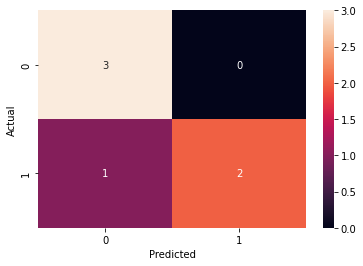

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Multi Variable Logistic Regression

In [30]:
X = train_data[data_list]
X_test = test_data[data_list]

model3 = linear_model.LogisticRegression()
model3.fit(X.values, y)

y_pred = model3.predict(X_test.values)

print(model3.predict([[2,1,3]]))

[1]


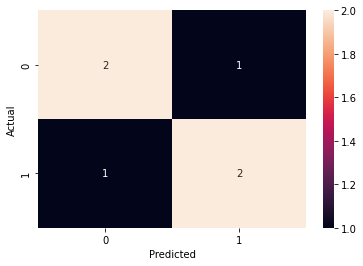

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

## test 만들기

In [31]:
test_input = [
              [4,7,2],
              [3,9,3],
              [4,10,6],
              [3,6,3],
              [5,11,5],
              [5,6,5]
]
test_output = [
               [1],
               [0],
               [0],
               [1],
               [0],
               [1]
]

False


In [32]:
for one_input in test_input:
  one_vari_out = model2.predict([[ one_input[0] ]])
  mul_vari_out = model3.predict([one_input])
  output = test_output[test_input.index(one_input)]
  if one_vari_out == mul_vari_out :
    print("A B same")
  else :
    print("A B diff")
  if one_vari_out == output :
    print("A correct")
  elif mul_vari_out == output:
    print("B correct")
  else:
    print("Wrong")
  print("============================")

A B same
A correct
A B same
Wrong
A B diff
B correct
A B same
A correct
A B diff
B correct
A B diff
A correct
